<a href="https://colab.research.google.com/github/andandandand/jaguars/blob/main/notebooks/final/Visualize_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is used to visualize embeddings of a model .

# Installs, Imports and functions

this part will be cleaned up later .

In [ ]:
!pip install fiftyone
!pip install kneed

In [4]:

import pickle
import os
from pathlib import Path


import fiftyone as fo
from google.colab import drive
import pandas as pd

import numpy as np


## Classes

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

try:
    import umap
except ImportError:
    umap = None

def plot_embeddings_with_labels(
    embeddings,
    labels,
    method="pca",
    title=None,
    tsne_perplexity=30,
    tsne_learning_rate=200,
    tsne_n_iter=1000,
    umap_n_neighbors=15,
    umap_min_dist=0.1,
    random_state=42,
):
    # Dimensionality reduction
    method = method.lower()
    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, perplexity=tsne_perplexity,
                       learning_rate=tsne_learning_rate,
                       n_iter=tsne_n_iter,
                       random_state=random_state)
    elif method == "umap":
        if umap is None:
            raise ImportError("UMAP is not installed. Install it with `pip install umap-learn`.")
        reducer = umap.UMAP(n_components=2, n_neighbors=umap_n_neighbors,
                            min_dist=umap_min_dist,
                            random_state=random_state)
    else:
        raise ValueError("method must be one of ['pca', 'tsne', 'umap']")

    reduced = reducer.fit_transform(embeddings)

    # Get unique labels and assign colors from extended palette
    unique_labels = sorted(set(labels))
    n_labels = len(unique_labels)

    palette1 = sns.color_palette("tab20", 20)
    palette2 = sns.color_palette("tab20b", 20)
    palette3 = sns.color_palette("tab20c", 20)
    combined_palette = palette1 + palette2 + palette3  # total = 60
    cmap = combined_palette * (n_labels // 60 + 1)  # repeat if more than 60 labels

    label_to_color = {label: cmap[i] for i, label in enumerate(unique_labels)}
    colors = [label_to_color[label] for label in labels]

    # Plot
    plt.figure(figsize=(10, 8))
    for label in unique_labels:
        idxs = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(reduced[idxs, 0], reduced[idxs, 1],
                    label=label, c=[label_to_color[label]], s=30)

    plt.title(title or f"{method.upper()} of Embeddings by Label")
    plt.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid(True)
    plt.show()


# The Pipeline

In [6]:
# read dataset


# mount shahab
#drive.mount('/content/drive')
# mount davide
#drive.mount('/gdrive')

project_path = {"shahab" : Path("/content/drive/MyDrive/DataScience/Jaguars_Project") ,
             "davide" : Path("/gdrive/MyDrive/DSR/Jaguars_Project/")}

drive.mount("/content/drive/")


user = "shahab"

Mounted at /content/drive/


In [8]:

image_dir = project_path[user] / Path("images/cropped_body")
input_dir = project_path[user] / Path("datasets/dataset_v17")

dataset = fo.Dataset.from_dir(
    dataset_dir=str(input_dir),
    dataset_type=fo.types.FiftyOneDataset,
    rel_dir=image_dir,
)

Importing samples...


INFO:fiftyone.utils.data.importers:Importing samples...


 100% |███████████████| 3241/3241 [1.3s elapsed, 0s remaining, 2.4K samples/s]         


INFO:eta.core.utils: 100% |███████████████| 3241/3241 [1.3s elapsed, 0s remaining, 2.4K samples/s]         


### get the embedding of dataset

In [9]:
dataset

Name:        2025.04.10.15.57.25
Media type:  image
Num samples: 3241
Persistent:  False
Tags:        []
Sample fields:
    id:                               fiftyone.core.fields.ObjectIdField
    filepath:                         fiftyone.core.fields.StringField
    tags:                             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:                       fiftyone.core.fields.DateTimeField
    last_modified_at:                 fiftyone.core.fields.DateTimeField
    ground_truth:                     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    prediction:                       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations_body:               fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    bboxes_head:      

In [50]:
# visualize embedding color code on labels :
embedding_name = "dinov2_embedding_v2"
# Get the embeddings as a NumPy array
embeddings = np.array(dataset.values(embedding_name))

# Get the corresponding sample labels
labels = dataset.values("ground_truth.label")


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


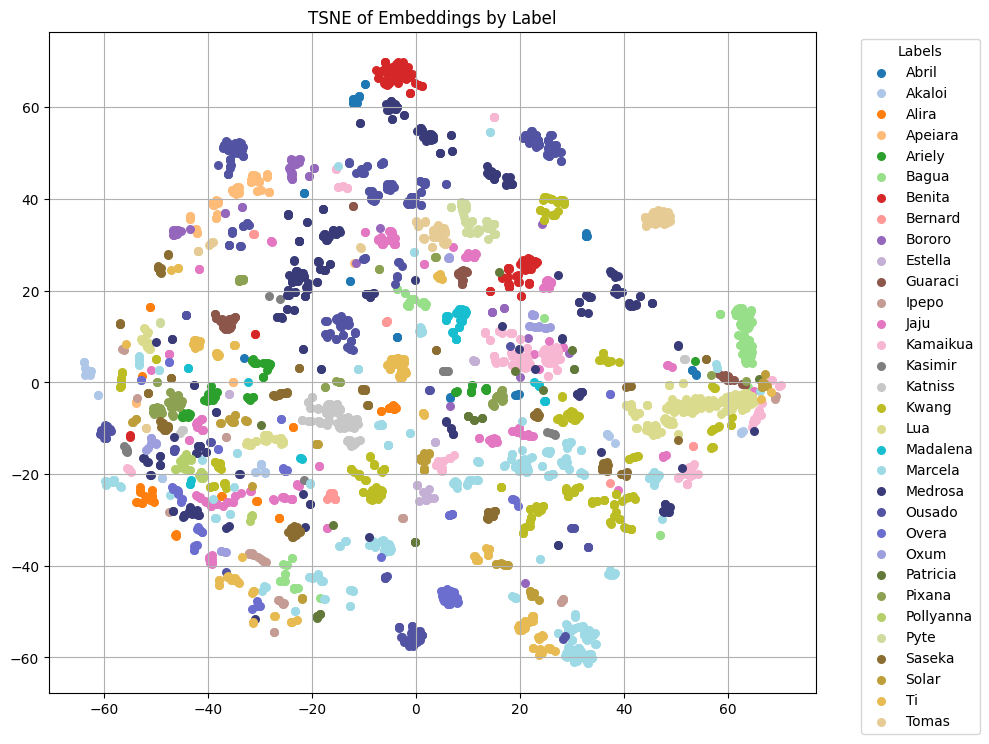

In [44]:
# we need to make a dict for visualizer to work
plot_embeddings_with_labels(
    embeddings,
    labels,
    method="tsne",
    tsne_perplexity=50,
    tsne_learning_rate=300,
    tsne_n_iter=1000
)

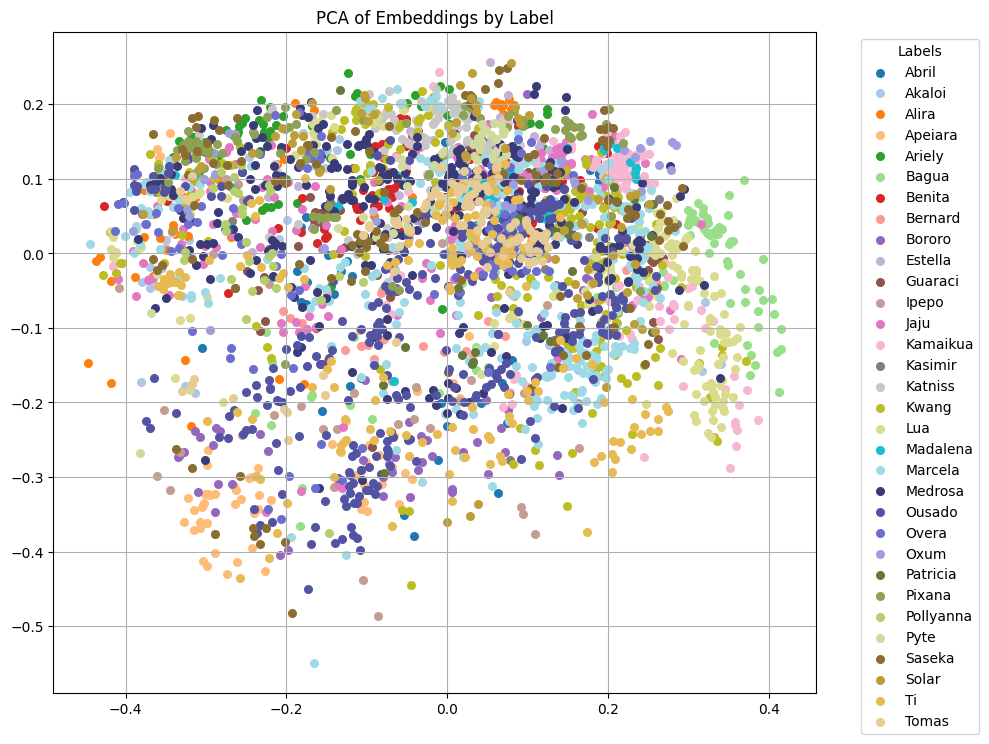

In [45]:
plot_embeddings_with_labels(
    embeddings,
    labels,
    method="pca"

)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


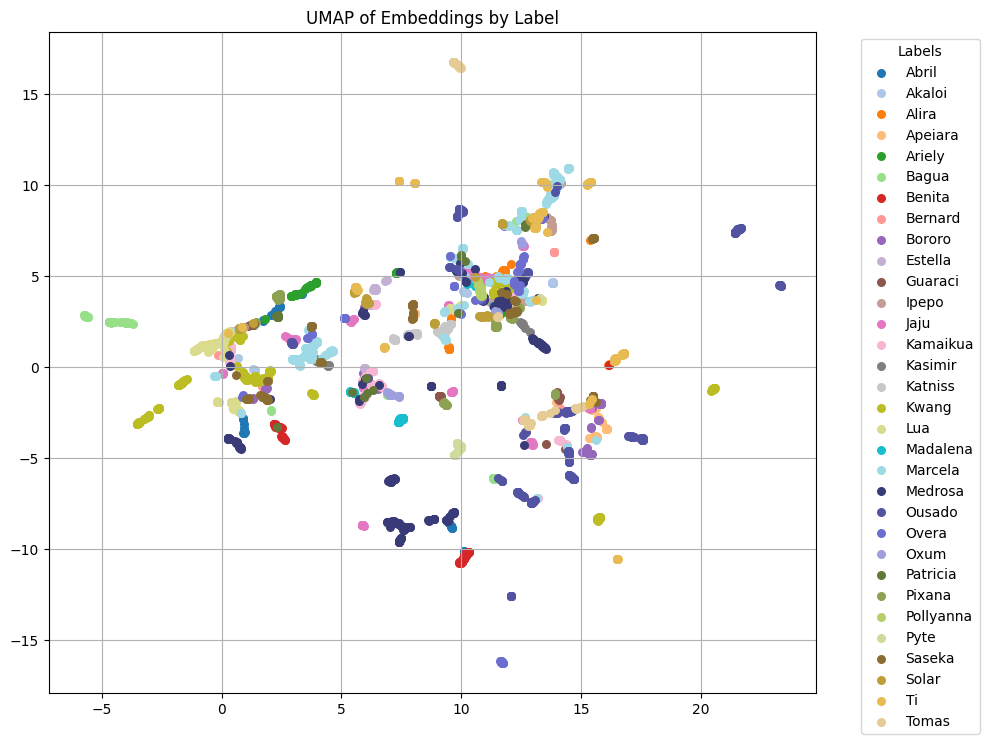

In [51]:
plot_embeddings_with_labels(
    embeddings,
    labels,
    method="umap"
)

In [46]:
embedding_name = "dinov2FT_embedding_v2"
embeddings = np.array(dataset.values(embedding_name))


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


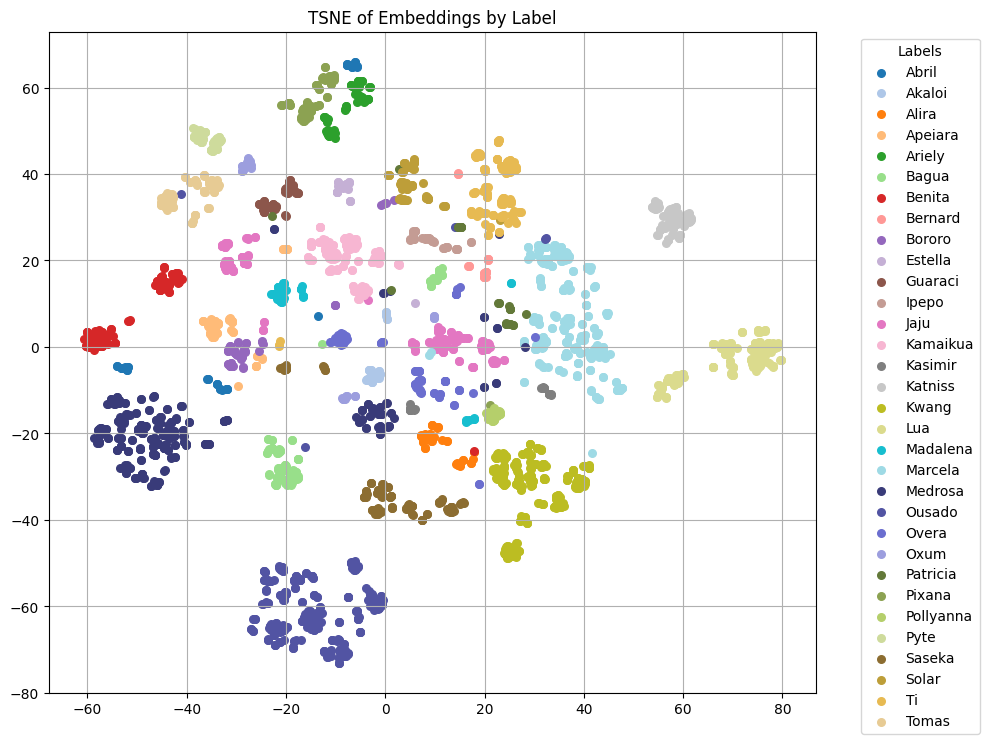

In [47]:
# we need to make a dict for visualizer to work
plot_embeddings_with_labels(
    embeddings,
    labels,
    method="tsne",
    tsne_perplexity=50,
    tsne_learning_rate=300,
    tsne_n_iter=1000
)

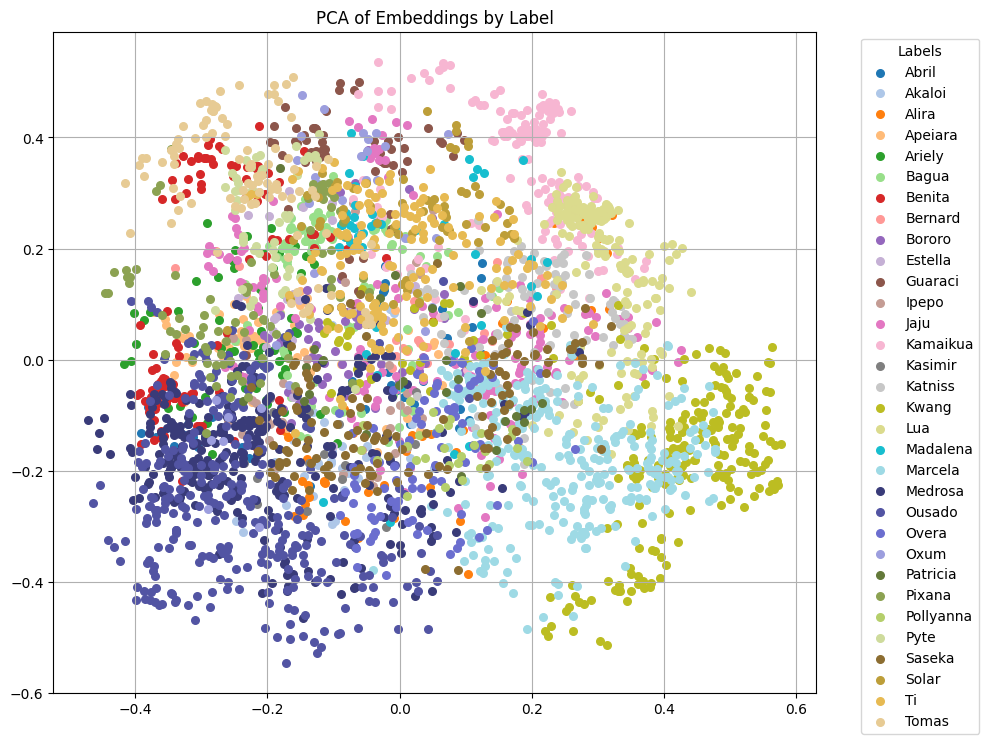

In [48]:
# we need to make a dict for visualizer to work
plot_embeddings_with_labels(
    embeddings,
    labels,
    method="pca"
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


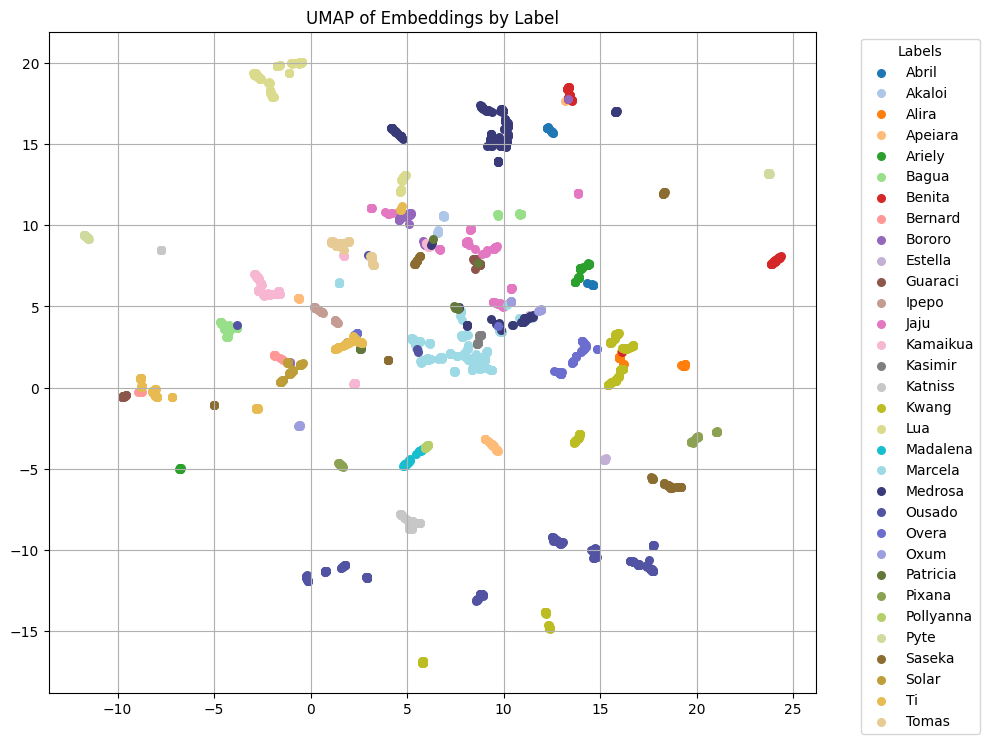

In [49]:
plot_embeddings_with_labels(
    embeddings,
    labels,
    method="umap"
)